   ZoneID   Count
0       1       5
1      10  474299
2     100  754724
3     101  133958
4     102  339270


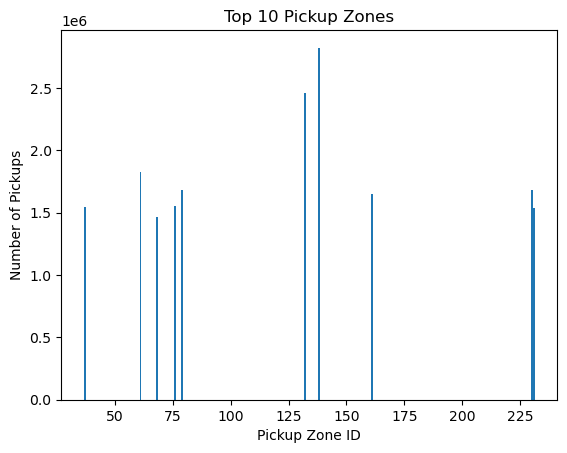

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Use raw string or double backslashes to avoid escape character issues
file_path = r"C:\Users\TevezCebekulu\Downloads\pickupzones.csv"

df = pd.read_csv(file_path, header=None, names=['ZoneID', 'Count'])

print(df.head())

# Example visualization
top10 = df.sort_values(by='Count', ascending=False).head(10)

plt.bar(top10['ZoneID'], top10['Count'])
plt.xlabel('Pickup Zone ID')
plt.ylabel('Number of Pickups')
plt.title('Top 10 Pickup Zones')
plt.show()

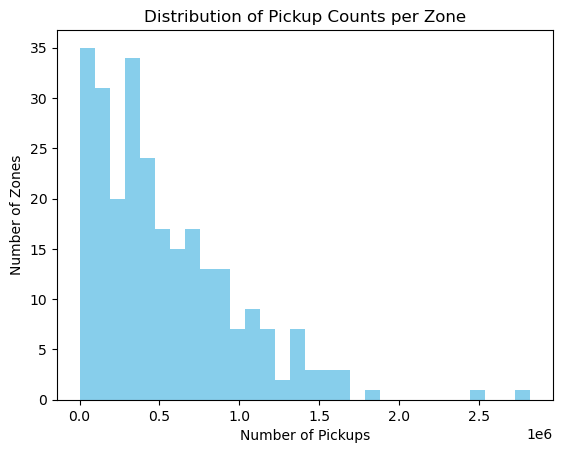

In [2]:
plt.hist(df['Count'], bins=30, color='skyblue')
plt.xlabel('Number of Pickups')
plt.ylabel('Number of Zones')
plt.title('Distribution of Pickup Counts per Zone')
plt.show()

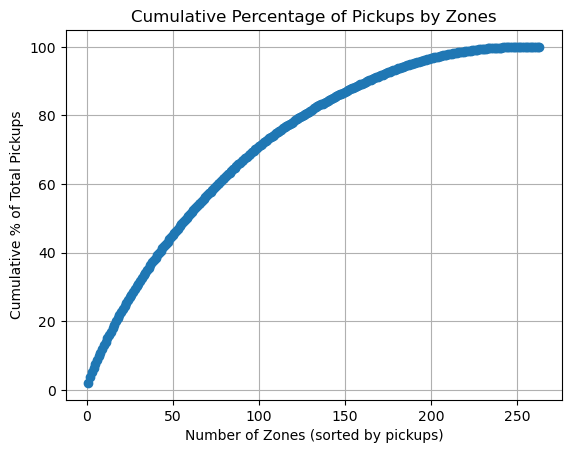

In [3]:
df_sorted = df.sort_values('Count', ascending=False).reset_index(drop=True)
df_sorted['CumulativeCount'] = df_sorted['Count'].cumsum()
df_sorted['CumulativePercent'] = 100 * df_sorted['CumulativeCount'] / df_sorted['Count'].sum()

plt.plot(df_sorted.index+1, df_sorted['CumulativePercent'], marker='o')
plt.xlabel('Number of Zones (sorted by pickups)')
plt.ylabel('Cumulative % of Total Pickups')
plt.title('Cumulative Percentage of Pickups by Zones')
plt.grid(True)
plt.show()

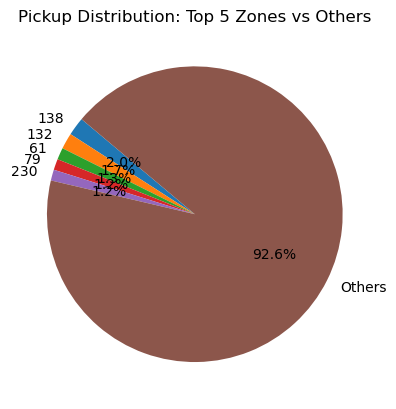

In [4]:
top5 = df_sorted.head(5)
others_sum = df_sorted['Count'][5:].sum()
sizes = list(top5['Count']) + [others_sum]
labels = list(top5['ZoneID'].astype(str)) + ['Others']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pickup Distribution: Top 5 Zones vs Others')
plt.show()

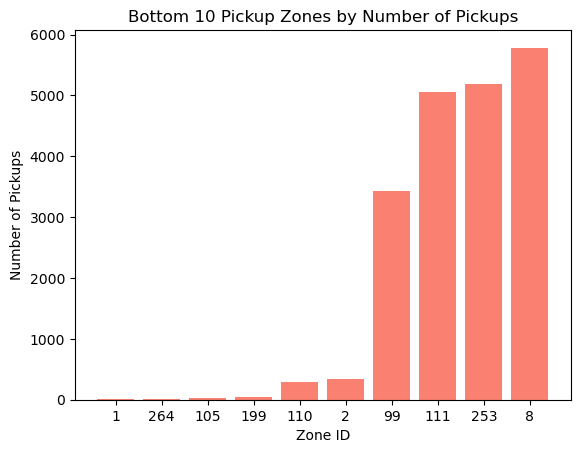

In [5]:
bottom10 = df.sort_values('Count').head(10)

plt.bar(bottom10['ZoneID'].astype(str), bottom10['Count'], color='salmon')
plt.xlabel('Zone ID')
plt.ylabel('Number of Pickups')
plt.title('Bottom 10 Pickup Zones by Number of Pickups')
plt.show()